In [1]:
!pip install efficientnet
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import efficientnet.tfkeras as efn

In [6]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your saved model (adjust this path as needed)
model_path = '/content/drive/My Drive/efficientnetb7_brain_tumor_model.h5'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the trained model
model = tf.keras.models.load_model(model_path)

In [8]:
# Define class names based on your dataset
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [9]:
# Function to preprocess and predict on a single image
def predict_tumor(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224), color_mode='rgb')  # EfficientNetB7 input size
    img_array = img_to_array(img) / 255.0  # Rescale to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class = class_names[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx] * 100

    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_class} ({confidence:.2f}% confidence)')
    plt.show()

    # Print raw predictions for debugging
    print("Raw predictions:", predictions)
    print(f"Predicted class: {predicted_class} with {confidence:.2f}% confidence")

    return predicted_class, confidence

In [10]:
# Example usage: Provide the path to your test image (adjust this path)
image_path = '/content/peti-tumor.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


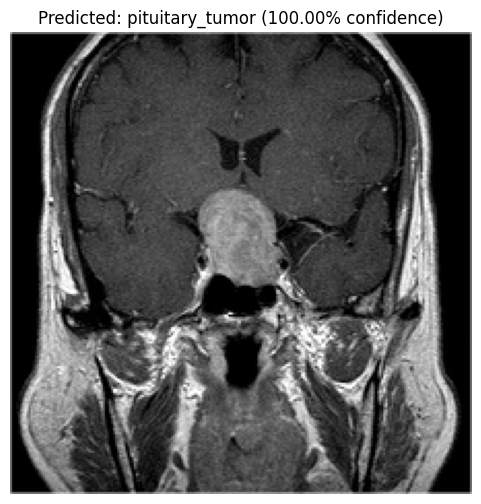

Raw predictions: [[4.3830369e-06 4.2293534e-05 3.1106536e-06 9.9995017e-01]]
Predicted class: pituitary_tumor with 100.00% confidence


In [11]:
# Predict and display
predicted_class, confidence = predict_tumor(image_path)

In [17]:
# Example usage: Provide the path to your test image (adjust this path)
image_path = '/content/tumor-n.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


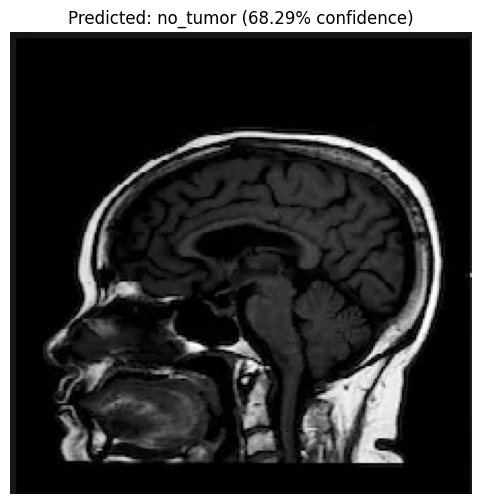

Raw predictions: [[2.9376388e-04 3.1098329e-02 6.8293720e-01 2.8567067e-01]]
Predicted class: no_tumor with 68.29% confidence


In [18]:
# Predict and display
predicted_class, confidence = predict_tumor(image_path)

In [15]:
# Example usage: Provide the path to your test image (adjust this path)
image_path = '/content/g_tumor.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


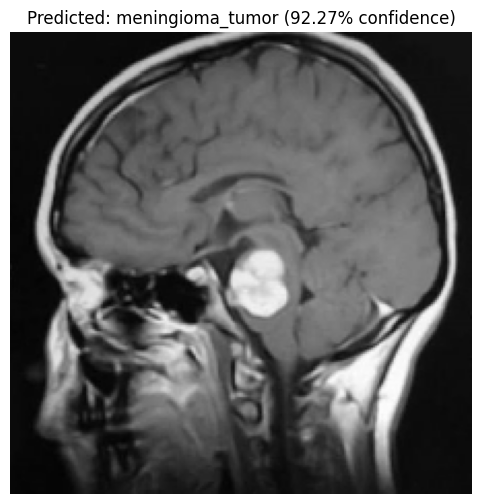

Raw predictions: [[0.00253679 0.9227299  0.00147749 0.07325578]]
Predicted class: meningioma_tumor with 92.27% confidence


In [16]:
# Predict and display
predicted_class, confidence = predict_tumor(image_path)